# Introduction
This notebook leverages pre-defined functions from the `train_svm.py` script to train an SVM model on the Sentiment140 dataset using TF-IDF features.

### Setup

In [1]:
import os
import sys
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
sys.path.append('../../src/models/')  # Add the path to the script

In [2]:
from train_svm import (
    load_data, vectorize_text, train_svm,
    evaluate_model, save_model_and_vectorizer
)

### Ensure the directory for figures exists

In [3]:
# Ensure the directory exists
output_dir = os.path.join('..', '..', 'reports', 'figures', 'models', 'svm')
os.makedirs(output_dir, exist_ok=True)

### Load the cleaned data

In [4]:
df = load_data('../../data/processed/cleaned_data.csv')
df = df.dropna(subset=['clean_text'])

### Feature Engineering: TF-IDF Vectorization

In [5]:
X, tfidf = vectorize_text(df, max_features=1000)
y = df['label']

### Train SVM Model

In [6]:
model = train_svm(X, y)

[LibLinear]

### Evaluate the Model

In [7]:
accuracy, report = evaluate_model(model, X, y)
print(f"Model Accuracy on Full Dataset: {accuracy}")
print("\nClassification Report:\n", report)

Model Accuracy on Full Dataset: 0.749733349246531

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74    796302
           1       0.73      0.78      0.76    795668

    accuracy                           0.75   1591970
   macro avg       0.75      0.75      0.75   1591970
weighted avg       0.75      0.75      0.75   1591970



In [8]:
y_pred = model.predict(X)

### Visualization (e.g., Confusion Matrix, ROC Curve)

Saving the plot to ..\..\reports\figures\models\svm\confusion_matrix_svm.png


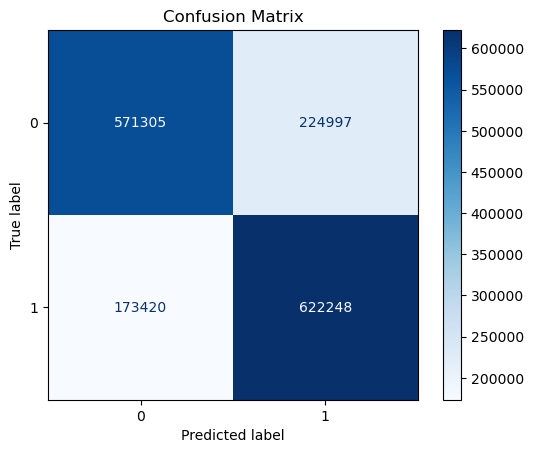

In [9]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix')
save_path = os.path.join(output_dir, 'confusion_matrix_svm.png')
print(f"Saving the plot to {save_path}")
plt.savefig(save_path)
plt.show()

Saving the plot to ..\..\reports\figures\models\svm\roc_curve_svm.png


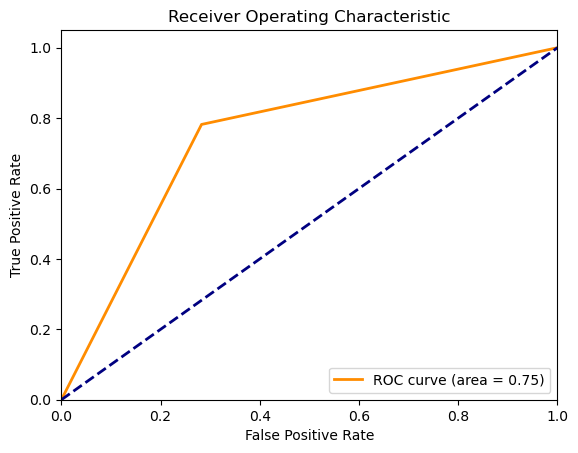

In [10]:
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
save_path = os.path.join(output_dir, 'roc_curve_svm.png')
print(f"Saving the plot to {save_path}")
plt.savefig(save_path)
plt.show()

### Save the model and TF-IDF transformer

In [11]:
save_model_and_vectorizer(
    model, tfidf,
    '../../models/svm_model.pkl',
    '../../models/tfidf_vectorizer_svm.pkl'
)